In [13]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../../gempy")

import gempy as gp
# Embedding matplotlib figures into the notebooks
%matplotlib inline

# Aux imports

import numpy as np
import pandas as pn
import matplotlib.pyplot as plt

In [14]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
              'theme': 'serif',
              'transition': 'slide',
              'start_slideshow_at': 'selected',
              'scroll': True,
})

{'scroll': True,
 'start_slideshow_at': 'selected',
 'theme': 'serif',
 'transition': 'slide'}

In [41]:
res = 40 # resolutions in x, y, z direction

x1=-10 # the extent of domain in x, y, z directions
x2=30
y1=-10
y2=20
z1=-10
z2=0

In [16]:
dx_voxel = (x2-x1)/res # computing the dimension dx, dy, dz of the voxel in x, y and z direction
dy_voxel = (y2-y1)/res
dz_voxel = (z2-z1)/res
print(dx_voxel, dy_voxel, dz_voxel)

diagonal = np.sqrt(dx_voxel**2 + dy_voxel**2 + dz_voxel**2) # length of the diagonal of each voxel
diagonal # maximum distance between two points in a cuboid

10.0 7.5 2.5


12.747548783981962

In [42]:
# Loading the data
geo_data = gp.create_data([x1,x2,y1,y2,z1,z2],[res,res,res],
                         path_f = "paper_Foliations.csv",
                         path_i = "paper_Points.csv")
geo_data.interface_add(X=10, Y=4, Z=-7, formation='fault1')

geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'Layer1', 'Z_std', 2)
geo_data.interfaces.set_value(geo_data.interfaces['formation'] == 'Layer2', 'Z_std', 2)


,X,Y,Z,formation,series,order_series,isFault,formation_number,annotations,Z_std
0,4.345153,5.0,-1.921564,fault1,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},0}$",NaN
1,10.000000,4.0,-7.000000,fault1,Default serie,1,False,1,"${\bf{x}}_{\alpha \,{\bf{1}},1}$",NaN
2,2.303022,5.0,-1.647248,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},0}$",NaN
3,1.083840,5.0,-1.738687,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},1}$",NaN
4,8.825648,5.0,-3.140747,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},2}$",NaN
5,15.561631,5.0,-3.232185,Unconformity,Default serie,1,False,2,"${\bf{x}}_{\alpha \,{\bf{2}},3}$",NaN
6,2.211584,5.0,-5.518153,Layer1,Default serie,1,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},0}$",2.0
7,11.172574,5.0,-6.981171,Layer1,Default serie,1,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},1}$",2.0
8,15.104438,5.0,-8.108915,Layer1,Default serie,1,False,3,"${\bf{x}}_{\alpha \,{\bf{3}},2}$",2.0
9,2.059186,5.0,-4.908561,Layer2,Default serie,1,False,4,"${\bf{x}}_{\alpha \,{\bf{4}},0}$",2.0


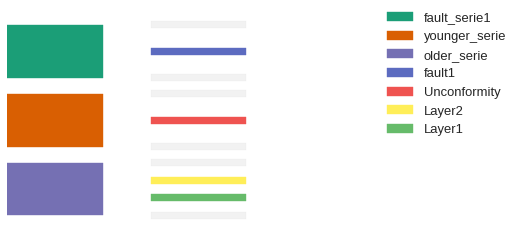

In [43]:
gp.set_series(geo_data, {'fault_serie1': 'fault1','younger_serie' : 'Unconformity', 'older_serie': ('Layer1', 'Layer2')},
              order_formations= ['fault1', 'Unconformity', 'Layer2', 'Layer1'], verbose=2)

geo_data.interface_modify(9, Z = -6.4)

fig=plt.gcf()
#fig.savefig('doc/figs/fault_p.png')

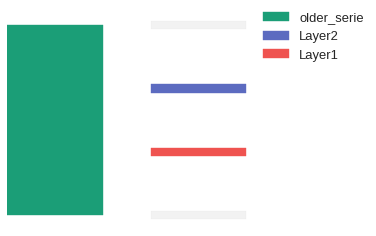

In [44]:
# Choosing just the series without any fault or unconforimity
geo_data = gp.select_series(geo_data, ['older_serie'])
gp.get_sequential_pile(geo_data)

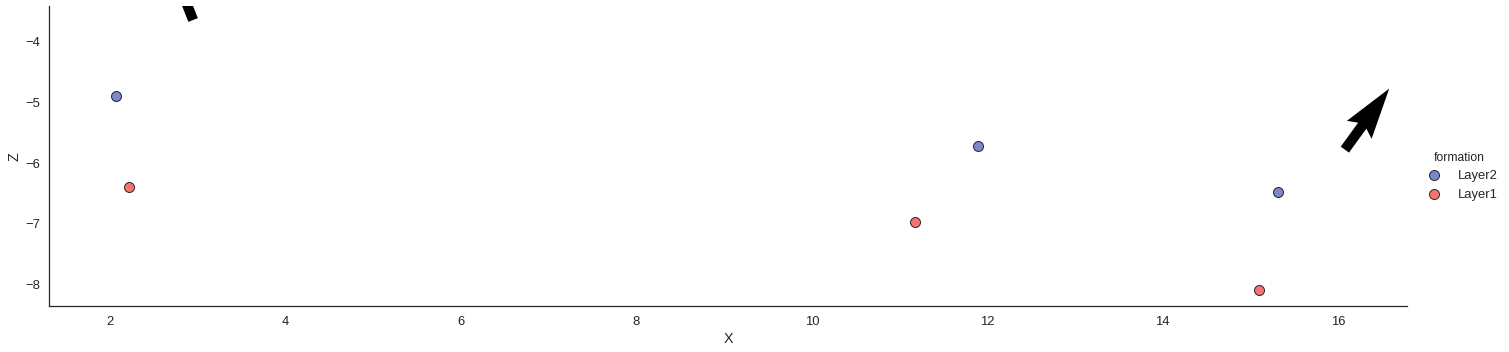

In [40]:
gp.plot_data(geo_data)

In [21]:
# voxel_centers = geo_data.grid.grid
# voxel_centers, len(voxel_centers)

In [22]:
# Computing the center of each voxel in this cell

voxel_centers_x = np.zeros(res)
voxel_centers_y = np.zeros(res)
voxel_centers_z = np.zeros(res) # to store x, y, z coordinates corresponding to all voxel centers; NOTE that these won't store all voxel centers 

for division in range(0,res): # let's say we have 4 voxels in each direction then running the loop 4 times
    if division == 0: # starting from x1, y1, z1 and computing the center coordinates for voxels touching the boundary 
        voxel_centers_x[division] = x1 + dx_voxel/2
        voxel_centers_y[division] = y1 + dy_voxel/2
        voxel_centers_z[division] = z1 + dz_voxel/2
    else: # once we have boundary voxel's center coordinates we can get remaining center coordinates by adding voxel size for the respective dimensions 
        voxel_centers_x[division] = voxel_centers_x[division-1] + dx_voxel
        voxel_centers_y[division] = voxel_centers_y[division-1] + dy_voxel
        voxel_centers_z[division] = voxel_centers_z[division-1] + dz_voxel    
        
print(voxel_centers_x, '\n', voxel_centers_y, '\n', voxel_centers_z)

voxel_centers = [] # to store all voxel centers

# taking all possible combinations of x, y, z coordinates and storing all voxel centers
for i in range(0,res):
    for j in range(0,res):
        for k in range(0,res):
            voxel_centers.append([voxel_centers_x[i], voxel_centers_y[j], voxel_centers_z[k]])
    
voxel_centers, len(voxel_centers)

[ -5.   5.  15.  25.] 
 [ -6.25   1.25   8.75  16.25] 
 [-8.75 -6.25 -3.75 -1.25]


([[-5.0, -6.25, -8.75],
  [-5.0, -6.25, -6.25],
  [-5.0, -6.25, -3.75],
  [-5.0, -6.25, -1.25],
  [-5.0, 1.25, -8.75],
  [-5.0, 1.25, -6.25],
  [-5.0, 1.25, -3.75],
  [-5.0, 1.25, -1.25],
  [-5.0, 8.75, -8.75],
  [-5.0, 8.75, -6.25],
  [-5.0, 8.75, -3.75],
  [-5.0, 8.75, -1.25],
  [-5.0, 16.25, -8.75],
  [-5.0, 16.25, -6.25],
  [-5.0, 16.25, -3.75],
  [-5.0, 16.25, -1.25],
  [5.0, -6.25, -8.75],
  [5.0, -6.25, -6.25],
  [5.0, -6.25, -3.75],
  [5.0, -6.25, -1.25],
  [5.0, 1.25, -8.75],
  [5.0, 1.25, -6.25],
  [5.0, 1.25, -3.75],
  [5.0, 1.25, -1.25],
  [5.0, 8.75, -8.75],
  [5.0, 8.75, -6.25],
  [5.0, 8.75, -3.75],
  [5.0, 8.75, -1.25],
  [5.0, 16.25, -8.75],
  [5.0, 16.25, -6.25],
  [5.0, 16.25, -3.75],
  [5.0, 16.25, -1.25],
  [15.0, -6.25, -8.75],
  [15.0, -6.25, -6.25],
  [15.0, -6.25, -3.75],
  [15.0, -6.25, -1.25],
  [15.0, 1.25, -8.75],
  [15.0, 1.25, -6.25],
  [15.0, 1.25, -3.75],
  [15.0, 1.25, -1.25],
  [15.0, 8.75, -8.75],
  [15.0, 8.75, -6.25],
  [15.0, 8.75, -3.75],
  [15.0

In [23]:
geo_data

In [24]:
# import theano.tensor as T
# T.nonzero_values?

In [25]:
#geo_data = gp.select_series(geo_data, ['fault_serie1', 'older_serie'])
#geo_data = gp.select_series(geo_data, ['fault_serie1', 'younger_serie'])
#geo_data = gp.select_series(geo_data, ['younger_serie', 'older_serie'])
#geo_data = gp.select_series(geo_data, ['fault_serie1'])

In [45]:
# Checking that works
interp_data = gp.InterpolatorInput(geo_data, u_grade=[3, 3, 3], dtype='float64', verbose=[])

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64


In [46]:
lith, fault = gp.compute_model(interp_data)


In [47]:
lith

array([[   0.        ,    0.        ,    2.        , ...,    1.        ,
           1.        ,    1.        ],
       [ 950.56189231,  950.57736032,  950.5928353 , ...,  951.46220817,
         951.47706886,  951.49193027]])

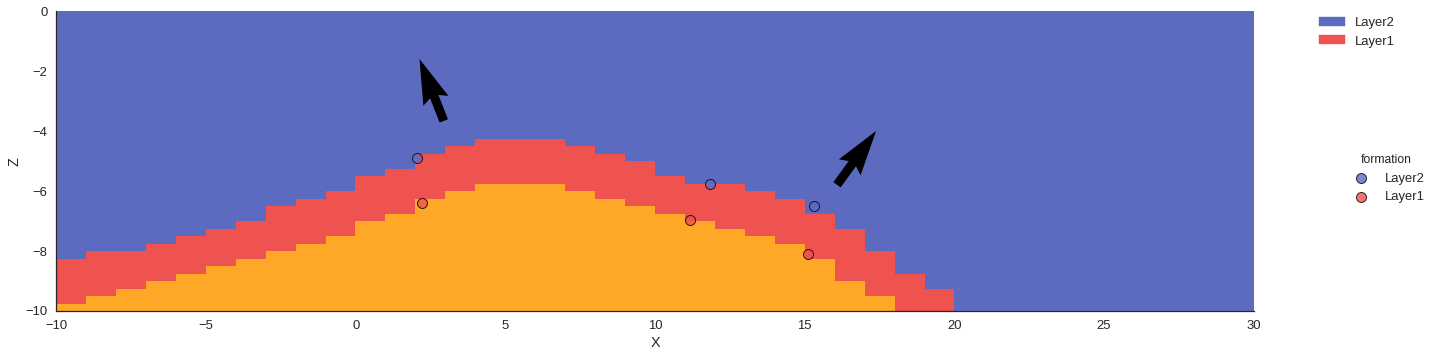

In [49]:
# Plot section
gp.plot_section(geo_data, lith[0], 20, plot_data=True)

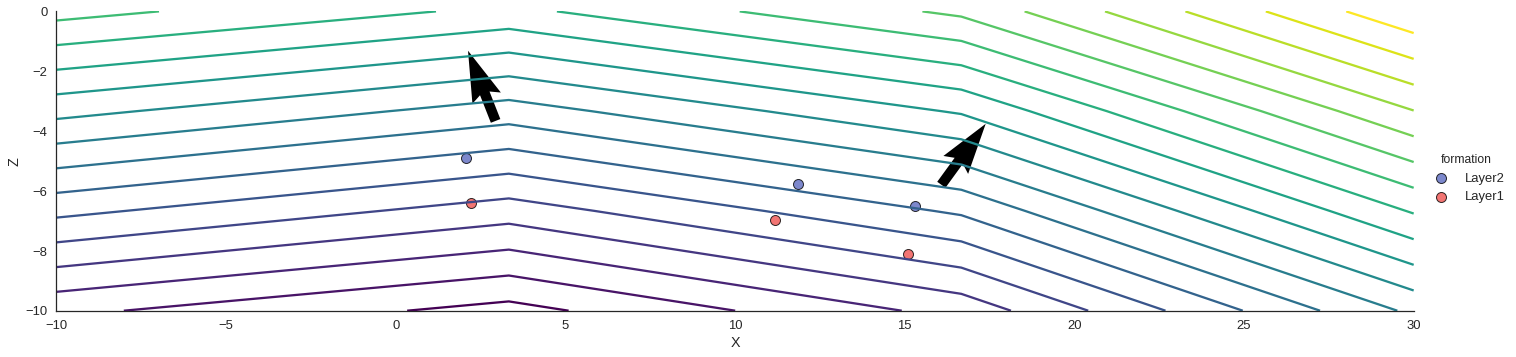

In [30]:
# Plot potential field
gp.plot_potential_field(geo_data, lith[1], 0, plot_data=True, cmap='viridis')
#plt.savefig('doc/figs/SimpleField.png')


In [51]:
ver_s, sim_s = gp.get_surfaces(interp_data,lith[1],
                               None,
                               original_scale=True)

In [32]:
ver_s

[array([[  0.        ,  -9.80060423,  -7.5       ],
        [-10.        ,  -2.5       ,  -8.74106079],
        [ -4.91608202,  -2.5       ,  -7.5       ],
        [  0.        , -10.        ,  -7.53485426],
        [-10.        , -10.        ,  -8.63457456],
        [  0.        ,  -2.5       ,  -6.28028482],
        [-10.        ,   5.        ,  -8.74106079],
        [ -4.91608202,   5.        ,  -7.5       ],
        [  0.        ,   5.        ,  -6.28028482],
        [  0.        ,  12.5       ,  -7.53486529],
        [  0.        ,  12.30060458,  -7.5       ],
        [-10.        ,  12.5       ,  -8.63457456],
        [  6.29542828,  -2.5       ,  -7.5       ],
        [ 10.        ,  -2.5       ,  -8.28973681],
        [ 10.        , -10.        ,  -9.28835042],
        [  6.29542828,   5.        ,  -7.5       ],
        [ 10.        ,   5.        ,  -8.28973681],
        [ 10.        ,  12.5       ,  -9.28857878],
        [ 13.24636221,  -2.5       , -10.        ],
        [ 11

In [33]:
len(ver_s[0]), len(ver_s[1])

(22, 22)

In [34]:
sim_s

[array([[ 2,  1,  0],
        [ 1,  3,  0],
        [ 1,  4,  3],
        [ 5,  2,  0],
        [ 7,  6,  2],
        [ 2,  6,  1],
        [ 2,  5,  8],
        [ 2,  8,  7],
        [10,  9,  7],
        [ 9,  6,  7],
        [ 9, 11,  6],
        [10,  7,  8],
        [ 0,  3, 12],
        [ 3, 13, 12],
        [ 3, 14, 13],
        [12,  5,  0],
        [12, 13, 15],
        [15, 13, 16],
        [15,  8,  5],
        [15,  5, 12],
        [15, 16, 10],
        [16,  9, 10],
        [16, 17,  9],
        [15, 10,  8],
        [18, 13, 14],
        [18, 14, 19],
        [20, 16, 13],
        [20, 13, 18],
        [21, 17, 16],
        [21, 16, 20]], dtype=int32), array([[ 2,  1,  0],
        [ 1,  3,  0],
        [ 1,  4,  3],
        [ 5,  2,  0],
        [ 7,  6,  2],
        [ 2,  6,  1],
        [ 2,  5,  8],
        [ 2,  8,  7],
        [10,  9,  7],
        [ 9,  6,  7],
        [ 9, 11,  6],
        [10,  7,  8],
        [14, 13, 12],
        [14, 12,  0],
        [15, 14,  

In [35]:
len(sim_s[0]), len(sim_s[1])

(30, 30)

In [36]:
# Assigning each simplex of any layer to its voxel

def dist(x,y):  # function to compute distance between two points
    return np.sqrt(np.sum((x-y)**2))

layer_simplex_voxel = [] # to store ['layer number' 'simplex number' 'voxel number'] in that order

for layer, simplices in enumerate(sim_s): # for all layers in sim_s
    for i, index_ver_s in enumerate(simplices): # for all set of simplices in a layer; i = simplex no., index_ver_s indexes 3 vertices of a simplex 
        simplex_ver = ver_s[layer][index_ver_s] # ver_s[layer][index_ver_s] gives the vertex corresponding to the index of simplice for respective layer 
        for voxel_number, center in enumerate(voxel_centers): # comparing the distance between vertices of a simplex and voxel centers to diagonal/2
            if dist(simplex_ver[0], center) <= diagonal/2 :
                if dist(simplex_ver[1], center) <= diagonal/2 :
                    if dist(simplex_ver[2], center) <= diagonal/2 :
                        layer_simplex_voxel.append([layer, i, voxel_number]) # if all 3 vertices of a simplex suffice the condition then our simplex i belongs to this voxel 
                        break # remove it then single simplex gets assigned to multiple voxels

layer_simplex_voxel, len(layer_simplex_voxel) # here the voxel number corresponds to the order in which the voxel centers are stored during their computation 

# NOTE: Remove break to see multiple assignment of a simplex to the voxels. 
# For example, with res=4; Layer 1 is same w/ and w/o break but 13th and 14th simplex of layer 2 is getting assigned twice!

([[0, 0, 0],
  [0, 1, 0],
  [0, 2, 0],
  [0, 3, 1],
  [0, 4, 4],
  [0, 5, 4],
  [0, 6, 5],
  [0, 7, 5],
  [0, 8, 8],
  [0, 9, 8],
  [0, 10, 8],
  [0, 11, 9],
  [0, 12, 16],
  [0, 13, 16],
  [0, 14, 16],
  [0, 15, 17],
  [0, 16, 20],
  [0, 17, 20],
  [0, 18, 21],
  [0, 19, 21],
  [0, 20, 24],
  [0, 21, 24],
  [0, 22, 24],
  [0, 23, 25],
  [0, 24, 32],
  [0, 25, 32],
  [0, 26, 36],
  [0, 27, 36],
  [0, 28, 40],
  [0, 29, 40],
  [1, 0, 0],
  [1, 1, 0],
  [1, 2, 0],
  [1, 3, 1],
  [1, 4, 4],
  [1, 5, 4],
  [1, 6, 5],
  [1, 7, 5],
  [1, 8, 8],
  [1, 9, 8],
  [1, 10, 8],
  [1, 11, 9],
  [1, 12, 16],
  [1, 13, 16],
  [1, 14, 16],
  [1, 15, 16],
  [1, 16, 17],
  [1, 17, 20],
  [1, 18, 20],
  [1, 19, 21],
  [1, 20, 21],
  [1, 21, 24],
  [1, 22, 24],
  [1, 23, 24],
  [1, 24, 24],
  [1, 25, 25],
  [1, 26, 32],
  [1, 27, 36],
  [1, 28, 36],
  [1, 29, 40]],
 60)

In [52]:
gp.plot_surfaces_3D(geo_data, ver_s, sim_s)

## Gravity

In [ ]:
# For computing gravity we need to choose the flag output gravity
interp_data = gp.InterpolatorInput(geo_data, dtype='float32', verbose=[],  output='gravity')


In [ ]:
# After compoling we need to set so
gp.set_geophysics_obj(interp_data,  [0.1,19.9,.1,.9, -10, 0], # Extent
                                             [1,1], ) # Resoluion of the measurement

In [ ]:
# Now we compute the distances and the component z from the points where we want to compute gravity (in this case just 1 pixel)
# To all the voxels within a range
# This function also works to change the values of each rock type to densities
gp.precomputations_gravity(interp_data, 1, [2.92, 3.1, 2.61]) 

In [ ]:
# Now the function also return the gravity
gravity = gp.compute_model(interp_data, output='gravity')

In [ ]:
gravity

In [ ]:
grav = gp.compute_model(interp_data, 'gravity')

In [ ]:
grav

In [ ]:
# Here we can plot the model and the gravity. Because we are doing just one voxel the image is not too sexy
gp.plot_section(geo_data, lith[-1], 5, direction='z',plot_data=True)

plt.grid()
fig = plt.gcf()
ax = plt.gca()
ax.imshow([gravity], cmap='viridis', origin='lower', alpha=0.8, extent=[0,20,0,10])
plt.xlim(-2,22)
plt.ylim(-2,12)


### Doing this stochastically


In [ ]:
import pymc
interface_Z_stoch = []
foliations_dip_stoch = []
foliations_azimuth_stoch = []

# We rescale the standard deviation
# std = 20./interp_data.rescaling_factor

# loop over the unique group id's and create a pymc.Normal distribution for each
for ind, i in interp_data.geo_data_res.interfaces.iterrows():
    stoch = pymc.Normal(i['formation']+str(ind)+'_stoch', i['Z'], 1./i['Z_std']**2)
    interface_Z_stoch.append(stoch)


In [ ]:
import copy
# First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
# geo_data_stoch is a pandas Dataframe

# This is the inital model so it has to be outside the stochastic frame
geo_data_stoch_init = copy.deepcopy(interp_data.geo_data_res)

In [ ]:
# Insert stochastic parameters to the input data. This are the prior we have to store

@pymc.deterministic(trace=True)
def input_data(value = 0, 
               interface_Z_modifier = interface_Z_stoch,
               geo_data_stoch_init = geo_data_stoch_init,
         
               verbose=0):
    # First we extract from our original intep_data object the numerical data that is necessary for the interpolation.
    # geo_data_stoch is a pandas Dataframe
    geo_data_stoch = gp.get_data(geo_data_stoch_init, numeric=True)

    geo_data_stoch.xs('interfaces')['Z'] = np.array(interface_Z_modifier)
  
    if verbose > 0:
        print(geo_data_stoch)
        
    # then return the input data to be input into the modeling function. Due to the way pymc2 stores the traces
    # We need to save the data as numpy arrays
    return [geo_data_stoch.xs('interfaces')[["X", "Y", "Z"]].values, geo_data_stoch.xs('foliations').values]

In [ ]:
# Computing the model and the gravity

@pymc.deterministic(trace=False)
def gempy_model(value=0,
                input_data=input_data, verbose=False):

    # modify input data values accordingly
    interp_data.geo_data_res.interfaces[["X", "Y", "Z"]] = input_data[0]

    # Gx, Gy, Gz are just used for visualization. The theano function gets azimuth dip and polarity!!!
    interp_data.geo_data_res.foliations[["G_x", "G_y", "G_z", "X", "Y", "Z", 'azimuth', 'dip', 'polarity']] = input_data[1]

    try:
        # try to compute model
#         lb, fb, grav = gp.compute_model(interp_data, output='gravity')
        grav = gp.compute_model(interp_data, output='gravity')
        if False:
            gp.plot_section(interp_data.geo_data_res, lb[0], 19, plot_data=True)
           # gp.plot_data(interp_data.geo_data_res, direction='y')

#       return lb, fb, grav // commented
        return grav



# try to compute model
        # lb, fb, grav = gp.compute_model(interp_data, output='gravity') // commented
        #lb, fb = gp.compute_model(interp_data)
        grav = gp.compute_model(interp_data, output='gravity')
        if False:
            gp.plot_section(interp_data.geo_data_res, lb[0], 19, plot_data=True)
           # gp.plot_data(interp_data.geo_data_res, direction='y')

        #return lb, fb, grav
        return grav
    
    

    except np.linalg.linalg.LinAlgError as err:
        # if it fails (e.g. some input data combinations could lead to
        # a singular matrix and thus break the chain) return an empty model
        # with same dimensions (just zeros)
        if verbose:
            print("Exception occured.")
        return np.zeros_like(lith_block), np.zeros_like(fault_block), np.zeros_like(grav_block)

# We want to store the value of gravity but the models better not. The following chunck is only for that
@pymc.deterministic(trace=True)
def gravity(value=0, model=gempy_model):
    return model  #[2] removed

# This is a hack to force to compute the models
@pymc.stochastic(trace=True)
def nothing(value=0, gravity=gravity):
    return 1



In [ ]:
np.log(np.inf)

In [ ]:
# Choosing the parameters which play a role
np.random.seed(123456) # I think with this is enough to draw always the same priors to be able to compare several resolutions but check the results to be sure!

p_model = pymc.Model([*interface_Z_stoch, input_data, gempy_model, gravity, nothing])

In [ ]:
S = pymc.MCMC(input=p_model, db="hdf5", dbname="MCMC_s1500_r6.hdf5")
S.use_step_method(pymc.AdaptiveMetropolis, [*interface_Z_stoch, input_data, gempy_model, gravity, nothing], delay=1000)
S.db

In [ ]:
# Sampling
S.sample(1500, burn=100, tune_interval=100)

## Reading the posterior

In [ ]:
pymc.Matplot.plot(S)

In [ ]:
S.db.close()